## Anomaly detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/processed/hotel_reservations_encoded.csv')
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline
0,2,0,1,2,0,224,2017,10,2,0,...,1,0,0,0,0,0,0,0,0,1
1,2,0,2,3,0,5,2018,11,6,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,2,1,0,1,2018,2,28,0,...,1,0,0,0,0,0,0,0,0,0
3,2,0,0,2,0,211,2018,5,20,0,...,1,0,0,0,0,0,0,0,0,0
4,2,0,1,1,0,48,2018,4,11,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,...,0,0,0,1,0,0,0,0,0,0
36271,2,0,1,3,0,228,2018,10,17,0,...,1,0,0,0,0,0,0,0,0,0
36272,2,0,2,6,0,148,2018,7,1,0,...,1,0,0,0,0,0,0,0,0,0
36273,2,0,0,3,0,63,2018,4,21,0,...,1,0,0,0,0,0,0,0,0,0


## no_of_children

In [3]:
# Print the count of occurance of each value in the 'no_of_children' column
print(data['no_of_children'].value_counts())

no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64


In [4]:
# Select records from the data where the 'no_of_children' column has values 9 or 10 and get their index
index = data[(data['no_of_children'] == 9) | (data['no_of_children'] == 10)].index

In [5]:
# Show the records with the index
data.loc[index]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline
6338,2,10,0,2,0,37,2018,1,12,0,...,0,0,0,1,0,0,0,0,0,0
10041,1,9,2,1,0,11,2017,10,11,0,...,1,0,0,0,0,0,0,0,1,0
10061,2,9,2,5,0,8,2017,8,13,0,...,0,1,0,0,0,0,0,0,0,0


In [6]:
# Drop the records with the index
data.drop(index, inplace=True)

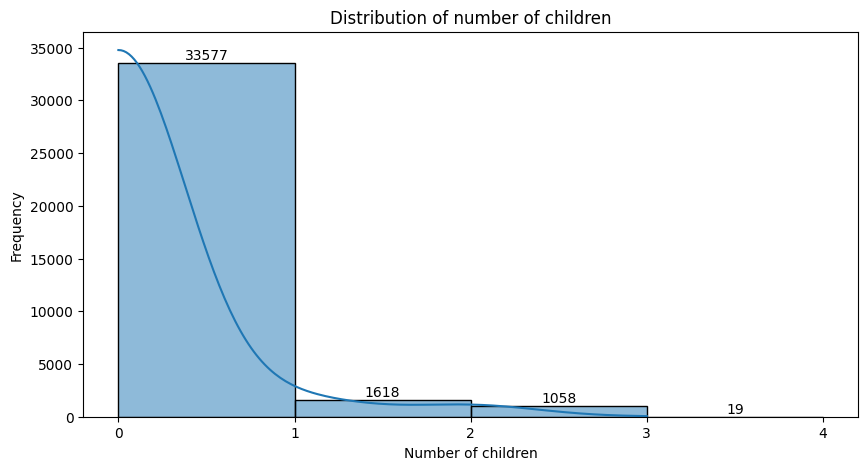

In [7]:
# Showing histogram for no_of_children
plt.figure(figsize=(10, 5))
sns.histplot(data['no_of_children'], kde=True, binwidth=1, binrange=(min(data['no_of_children']), max(data['no_of_children']) + 1), kde_kws={'bw_adjust': 8})
plt.title('Distribution of number of children')
plt.xlabel('Number of children')
plt.ylabel('Frequency')


# Count the number of records in each bin
value_counts = data['no_of_children'].value_counts()
total_records = len(data['no_of_children'])

# Display the count and percentage at the center of each bin
for index, count in value_counts.items():
    percentage = (count / total_records) * 100
    bin_center = index + 0.5  # Calculate the center of the bin
    plt.text(bin_center, count, f"{count}", ha='center', va='bottom')

# Set the x-ticks to be increased by 1
plt.xticks(range(min(data['no_of_children']), max(data['no_of_children']) + 2))

plt.savefig('../reports/images/no_of_children_distribution_after_cleaning.png')
plt.show()



In [8]:
# Convert the 'no_of_children' column to a binary column 'with_children' where 0 means no children and 1 means at least 1 child
data['with_children'] = np.where(data['no_of_children'] > 0, 1, 0)

# Drop the 'no_of_children' column
data.drop(columns=['no_of_children'], inplace=True, axis=1)

data.head()

,no_of_adults,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,with_children
0,2,1,2,0,224,2017,10,2,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,2,3,0,5,2018,11,6,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,1,0,1,2018,2,28,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,2,0,211,2018,5,20,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,0,48,2018,4,11,0,0,...,0,0,0,0,0,0,0,0,0,0


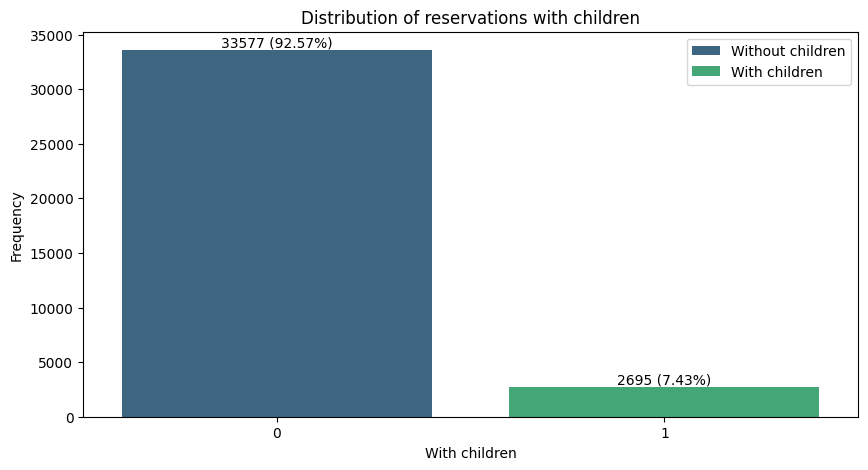

In [9]:
# Plot the bar chart for the 'with_children' column
plt.figure(figsize=(10, 5))
sns.barplot(x=data['with_children'].value_counts().index, y=data['with_children'].value_counts().values, palette='viridis', hue=['Without children', 'With children'])
plt.title('Distribution of reservations with children')
plt.xlabel('With children')
plt.ylabel('Frequency')

# Display the count and percentage at the top of each bar
for index, count in data['with_children'].value_counts().items():
    percentage = (count / total_records) * 100
    plt.text(index, count, f"{count} ({percentage:.2f}%)", ha='center', va='bottom')

plt.savefig('../reports/images/with_children_distribution.png')
plt.show()

## no_of_weekend_nights

In [10]:
# Get the count of each value in the 'no_of_weekend_nights' column
data['no_of_weekend_nights'].value_counts()

no_of_weekend_nights
0    16871
1     9995
2     9069
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

In [11]:
# Group the values in the 'no_of_weekend_nights' column into following bins
# 0: 0 nights
# 1: 1 night
# 2: 2 nights
# 3: 3 and 4 nights
# 4: 5 and 6 nights
# 5: 7 or more nights
grouped_data = data['no_of_weekend_nights'].apply(lambda x: '0' if x == 0 else '1' if x == 1 else '2' if x == 2 else '3-4' if x in [3, 4] else '5-6' if x in [5, 6] else '7')

In [12]:
grouped_data.value_counts()

no_of_weekend_nights
0      16871
1       9995
2       9069
3-4      282
5-6       54
7          1
Name: count, dtype: int64

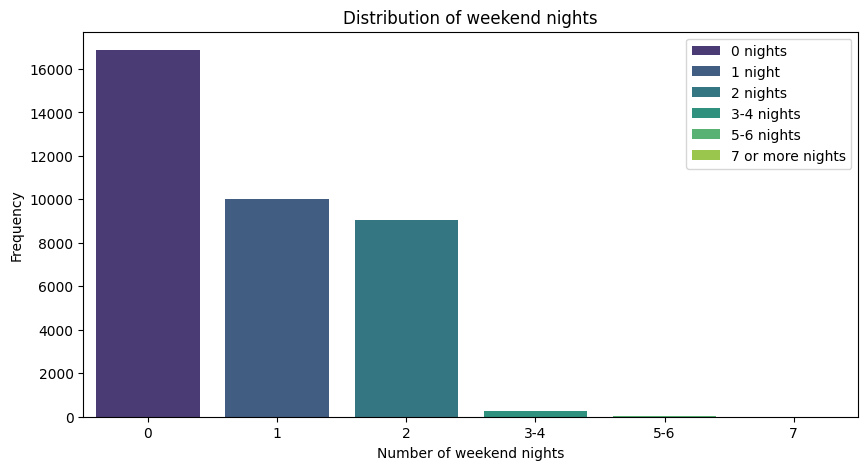

In [13]:
# Plot the bar chart for the grouped_data
plt.figure(figsize=(10, 5))
sns.barplot(x=grouped_data.value_counts().index, y=grouped_data.value_counts().values, palette='viridis', hue=['0 nights', '1 night', '2 nights', '3-4 nights', '5-6 nights', '7 or more nights'])
plt.title('Distribution of weekend nights')
plt.xlabel('Number of weekend nights')
plt.ylabel('Frequency')
    
plt.savefig('../reports/images/no_of_weekend_nights_distribution.png')
plt.show()

In [14]:
weekend_nights = data['no_of_weekend_nights'].value_counts()

for index, count in weekend_nights.items():
    index_index = data[(data['no_of_weekend_nights'] == index)].index
    value_counts = data.loc[index_index]['no_of_week_nights'].value_counts()

    print(f"Number of weekend nights: {index}")
    print(value_counts)

Number of weekend nights: 0
no_of_week_nights
2    5744
1    5082
3    4180
4    1529
5     258
0      78
Name: count, dtype: int64
Number of weekend nights: 1
no_of_week_nights
2    3406
3    2071
1    1940
0    1522
4     743
5     313
Name: count, dtype: int64
Number of weekend nights: 2
no_of_week_nights
1     2465
2     2293
3     1588
5      972
0      787
4      718
6      126
7       63
8       38
9       14
10       5
Name: count, dtype: int64
Number of weekend nights: 3
no_of_week_nights
5     53
7     39
6     31
8     14
9      9
10     7
Name: count, dtype: int64
Number of weekend nights: 4
no_of_week_nights
10    32
6     32
5     17
11    13
9     11
7     11
8     10
12     2
15     1
Name: count, dtype: int64
Number of weekend nights: 5
no_of_week_nights
10    18
15     5
12     5
11     4
14     1
13     1
Name: count, dtype: int64
Number of weekend nights: 6
no_of_week_nights
14    6
15    4
13    4
17    2
12    2
16    2
Name: count, dtype: int64
Number of weekend 

In [15]:
# Check if there are any records where the 'no_of_weekend_nights' is 0 and the 'no_of_week_nights' is also 0
data[(data['no_of_weekend_nights'] == 0) & (data['no_of_week_nights'] == 0)]

,no_of_adults,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,with_children
209,1,0,0,0,4,2018,2,27,0,0,...,0,0,0,0,0,0,1,0,0,0
1158,2,0,0,0,145,2018,7,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1403,3,0,0,0,57,2018,4,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1907,2,0,0,0,247,2018,6,6,0,0,...,0,0,0,0,0,0,0,0,0,0
1986,2,0,0,0,43,2017,10,17,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33218,1,0,0,0,1,2018,2,6,0,0,...,0,0,0,0,0,0,0,0,0,0
33537,2,0,0,0,166,2018,4,21,0,0,...,1,0,0,0,0,0,0,0,0,0
34750,1,0,0,0,1,2017,10,22,0,0,...,0,0,1,0,0,0,1,0,0,0
35472,1,0,0,0,7,2018,2,15,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Drop the records where the 'no_of_weekend_nights' is 0 and the 'no_of_week_nights' is also 0
index = data[(data['no_of_weekend_nights'] == 0) & (data['no_of_week_nights'] == 0)].index
data.drop(index, inplace=True)

In [17]:
index.shape # (78,)

(78,)

In [18]:
# Create categories for the 'no_of_weekend_nights' column as follows
# 0: 0 nights
# 1: 1 night
# 2: 2 nights
# 3+: 3 or more nights
data['no_of_weekend_nights'] = data['no_of_weekend_nights'].apply(lambda x: '0' if x == 0 else '1' if x == 1 else '2' if x == 2 else '3+')

data['no_of_weekend_nights'].value_counts()

no_of_weekend_nights
0     16793
1      9995
2      9069
3+      337
Name: count, dtype: int64

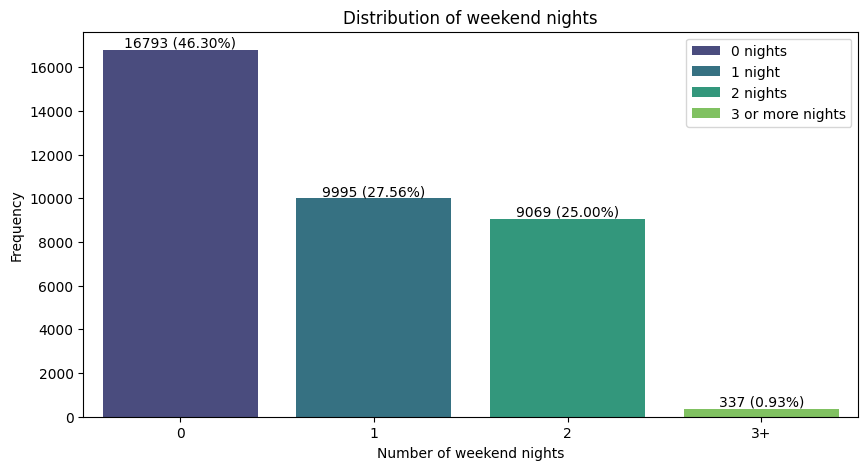

In [19]:
# Plot the bar chart for the 'no_of_weekend_nights' column
plt.figure(figsize=(10, 5))
sns.barplot(x=data['no_of_weekend_nights'].value_counts().index, y=data['no_of_weekend_nights'].value_counts().values, palette='viridis', hue=['0 nights', '1 night', '2 nights', '3 or more nights'])
plt.title('Distribution of weekend nights')
plt.xlabel('Number of weekend nights')
plt.ylabel('Frequency')

# Display the count and percentage at the top of each bar
for index, count in data['no_of_weekend_nights'].value_counts().items():
    percentage = (count / total_records) * 100
    plt.text(index, count, f"{count} ({percentage:.2f}%)", ha='center', va='bottom')

plt.savefig('../reports/images/no_of_weekend_nights_distribution.png')
plt.show()

In [20]:
# Implement one hot encoding for the 'no_of_weekend_nights' column using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [21]:
# Convert the 'no_of_weekend_nights' column to category data type
data['no_of_weekend_nights'] = data['no_of_weekend_nights'].astype('category')

# Use One-Hot Encoding to convert no_of_weekend_nights to a numerical variable
encoder = OneHotEncoder()

# Fit the encoder to the no_of_weekend_nights
encoder.fit(data[['no_of_weekend_nights']])

# Transform the no_of_weekend_nights
no_of_weekend_nights_encoded = encoder.transform(data[['no_of_weekend_nights']]).toarray().astype('int64')

# Create a DataFrame from the encoded data
no_of_weekend_nights_encoded_df = pd.DataFrame(
    no_of_weekend_nights_encoded,
    columns=encoder.get_feature_names_out(['no_of_weekend_nights'])
)

# Implement the n-1 rule by dropping the last column
no_of_weekend_nights_encoded_df = no_of_weekend_nights_encoded_df.drop(no_of_weekend_nights_encoded_df.columns[-1], axis=1)

no_of_weekend_nights_encoded_df.head()

,no_of_weekend_nights_0,no_of_weekend_nights_1,no_of_weekend_nights_2
0,0,1,0
1,0,0,1
2,0,0,1
3,1,0,0
4,0,1,0


In [22]:
# Drop the 'no_of_weekend_nights' column
data.drop(columns=['no_of_weekend_nights'], inplace=True, axis=1)

In [23]:
data.to_csv('../data/processed/temp.csv', index=False)

In [24]:
new_data = pd.read_csv('../data/processed/temp.csv')

In [25]:
# Concatenate the data with the encoded data
data = pd.concat([new_data, no_of_weekend_nights_encoded_df], axis=1)

## no_of_week_nights

In [26]:
no_of_week_nights = data['no_of_week_nights'].apply(lambda x: '0' if x == 0 else '1' if x == 1 else '2' if x == 2 else '3' if x == 3 else '4' if x == 4 else '5' if x == 5 else '6+' if x >= 6 else 'Unknown')

In [27]:
no_of_week_nights.value_counts()

no_of_week_nights
2     11443
1      9487
3      7839
4      2990
0      2309
5      1613
6+      513
Name: count, dtype: int64

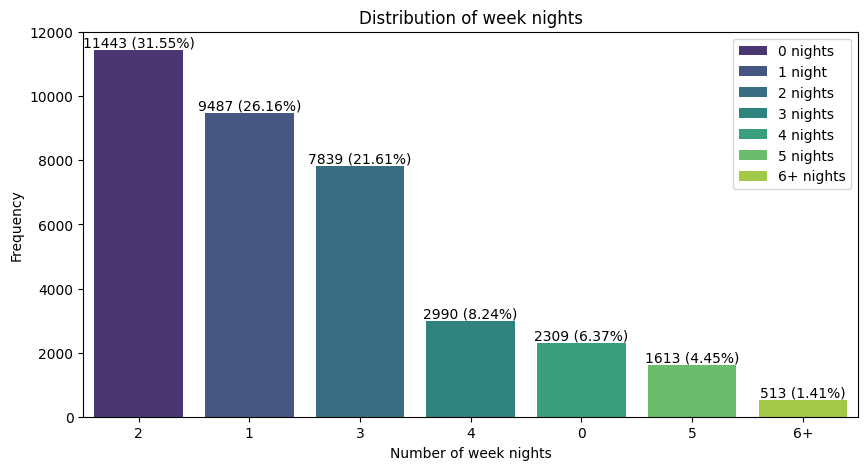

In [28]:
# Plot the bar chart using the no_of_week_nights variable
plt.figure(figsize=(10, 5))
sns.barplot(x=no_of_week_nights.value_counts().index, y=no_of_week_nights.value_counts().values, palette='viridis', hue=['0 nights', '1 night', '2 nights', '3 nights', '4 nights', '5 nights', '6+ nights'])
plt.title('Distribution of week nights')
plt.xlabel('Number of week nights')
plt.ylabel('Frequency')

# Display the count and percentage at the top of each bar
for index, count in no_of_week_nights.value_counts().items():
    percentage = (count / total_records) * 100
    plt.text(index, count, f"{count} ({percentage:.2f}%)", ha='center', va='bottom')
    
plt.savefig('../reports/images/no_of_week_nights_distribution.png')
plt.show()

In [29]:
# Concvert the 'no_of_week_nights' column to category data type
data['no_of_week_nights'] = data['no_of_week_nights'].astype('category')

# Apply the following categories to the 'no_of_week_nights' column
# 0: 0 nights
# 1: 1 night
# 2: 2 nights
# 3: 3 nights
# 4: 4 nights
# 5: 5 nights
# 6+: 6 or more nights
data['no_of_week_nights'] = data['no_of_week_nights'].apply(lambda x: '0' if x == 0 else '1' if x == 1 else '2' if x == 2 else '3' if x == 3 else '4' if x == 4 else '5' if x == 5 else '6+')

# Use One-Hot Encoding to convert no_of_week_nights to a numerical variable
encoder = OneHotEncoder()

# Fit the encoder to the no_of_week_nights
encoder.fit(data[['no_of_week_nights']])

# Transform the no_of_week_nights
no_of_week_nights_encoded = encoder.transform(data[['no_of_week_nights']]).toarray().astype('int64')

# Create a DataFrame from the encoded data
no_of_week_nights_encoded_df = pd.DataFrame(
    no_of_week_nights_encoded,
    columns=encoder.get_feature_names_out(['no_of_week_nights'])
)

# Implement the n-1 rule by dropping the last column
no_of_week_nights_encoded_df = no_of_week_nights_encoded_df.drop(no_of_week_nights_encoded_df.columns[-1], axis=1)

no_of_week_nights_encoded_df.head()

,no_of_week_nights_0,no_of_week_nights_1,no_of_week_nights_2,no_of_week_nights_3,no_of_week_nights_4,no_of_week_nights_5
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0


In [30]:
# Drop the 'no_of_week_nights' column
data.drop(columns=['no_of_week_nights'], inplace=True, axis=1)

# Concatenate the data with the encoded data
data = pd.concat([data, no_of_week_nights_encoded_df], axis=1)

data.head()

,no_of_adults,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,with_children,no_of_weekend_nights_0,no_of_weekend_nights_1,no_of_weekend_nights_2,no_of_week_nights_0,no_of_week_nights_1,no_of_week_nights_2,no_of_week_nights_3,no_of_week_nights_4,no_of_week_nights_5
0,2,0,224,2017,10,2,0,0,0,65.00,...,0,0,1,0,0,0,1,0,0,0
1,2,0,5,2018,11,6,0,0,0,106.68,...,0,0,0,1,0,0,0,1,0,0
2,1,0,1,2018,2,28,0,0,0,60.00,...,0,0,0,1,0,1,0,0,0,0
3,2,0,211,2018,5,20,0,0,0,100.00,...,0,1,0,0,0,0,1,0,0,0
4,2,0,48,2018,4,11,0,0,0,94.50,...,0,0,1,0,0,1,0,0,0,0


## required_car_parking_space

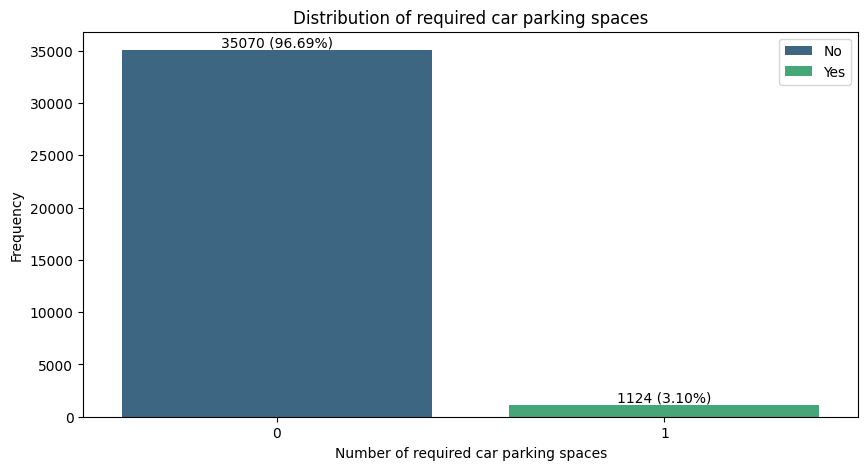

In [31]:
# Plot the bar chart of the 'required_car_parking_spaces' column
plt.figure(figsize=(10, 5))
sns.barplot(x=data['required_car_parking_space'].value_counts().index, y=data['required_car_parking_space'].value_counts().values, palette='viridis', hue=['No', 'Yes'])
plt.title('Distribution of required car parking spaces')
plt.xlabel('Number of required car parking spaces')
plt.ylabel('Frequency')

# Display the count and percentage at the top of each bar
for index, count in data['required_car_parking_space'].value_counts().items():
    percentage = (count / total_records) * 100
    plt.text(index, count, f"{count} ({percentage:.2f}%)", ha='center', va='bottom')
    
# plt.savefig('../reports/images/required_car_parking_spaces_distribution.png')
plt.show()

In [32]:
# Drop the 'required_car_parking_space' column
data.drop(columns=['required_car_parking_space'], inplace=True, axis=1)
data.head()

,no_of_adults,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,...,with_children,no_of_weekend_nights_0,no_of_weekend_nights_1,no_of_weekend_nights_2,no_of_week_nights_0,no_of_week_nights_1,no_of_week_nights_2,no_of_week_nights_3,no_of_week_nights_4,no_of_week_nights_5
0,2,224,2017,10,2,0,0,0,65.00,0,...,0,0,1,0,0,0,1,0,0,0
1,2,5,2018,11,6,0,0,0,106.68,1,...,0,0,0,1,0,0,0,1,0,0
2,1,1,2018,2,28,0,0,0,60.00,0,...,0,0,0,1,0,1,0,0,0,0
3,2,211,2018,5,20,0,0,0,100.00,0,...,0,1,0,0,0,0,1,0,0,0
4,2,48,2018,4,11,0,0,0,94.50,0,...,0,0,1,0,0,1,0,0,0,0


## Repeated guest

In [33]:
# Drop the 'repeated_guest' column
data.drop(columns=['repeated_guest'], inplace=True, axis=1)

In [34]:
data.head()

,no_of_adults,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,...,with_children,no_of_weekend_nights_0,no_of_weekend_nights_1,no_of_weekend_nights_2,no_of_week_nights_0,no_of_week_nights_1,no_of_week_nights_2,no_of_week_nights_3,no_of_week_nights_4,no_of_week_nights_5
0,2,224,2017,10,2,0,0,65.00,0,0,...,0,0,1,0,0,0,1,0,0,0
1,2,5,2018,11,6,0,0,106.68,1,0,...,0,0,0,1,0,0,0,1,0,0
2,1,1,2018,2,28,0,0,60.00,0,1,...,0,0,0,1,0,1,0,0,0,0
3,2,211,2018,5,20,0,0,100.00,0,1,...,0,1,0,0,0,0,1,0,0,0
4,2,48,2018,4,11,0,0,94.50,0,1,...,0,0,1,0,0,1,0,0,0,0


## Number of previous cancelations

In [35]:
# Drop the 'no_of_previous_cancellations' column
data.drop(columns=['no_of_previous_cancellations'], inplace=True, axis=1)

## no_of_previous_bookings_not_canceled

In [36]:
# Drop the 'no_of_previous_bookings_not_canceled' column
data.drop(columns=['no_of_previous_bookings_not_canceled'], inplace=True, axis=1)

In [37]:
data.shape

(36194, 31)

## avg_price_per_room

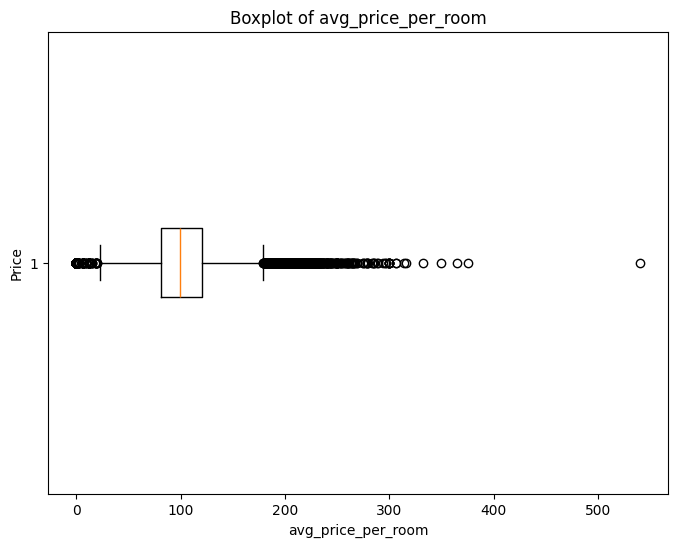

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(data['avg_price_per_room'], vert=False)
plt.title('Boxplot of avg_price_per_room')
plt.xlabel('avg_price_per_room')
plt.ylabel('Price')
plt.savefig('../reports/images/boxplot_avg_price_per_room.png')
plt.show()

In [39]:
# Filter the data to select rows where the average price per room is zero
zero_avg_price_per_room = data[data['avg_price_per_room'] == 0]

# Get the shape of the filtered data
zero_avg_price_per_room.shape[0]

467

In [40]:
# Count the number of rows in where market segment type is Complementary and average price per room is zero
zero_avg_price_per_room['market_segment_type_Complementary'].sum()

np.int64(341)

In [41]:
data.shape

(36194, 31)

In [42]:
index = data[(data['avg_price_per_room'] == 0) & (data['market_segment_type_Complementary'] == 0)].index
print(index)
print("Number of records:", len(index))

Index([ 1045,  1174,  1399,  2741,  2772,  3014,  3095,  3561,  4597,  5331,
       ...
       34460, 34491, 34548, 34593, 34927, 35268, 35880, 36033, 36136, 36169],
      dtype='int64', length=126)
Number of records: 126


In [43]:
data = data.drop(index)

In [44]:
data.shape

(36068, 31)

In [45]:
# Find records with avg price over 500
high_price_records = data[data['avg_price_per_room'] > 500]

In [46]:
# Drop records with avg price over 500
data = data[data['avg_price_per_room'] <= 500]

In [47]:
data.shape

(36067, 31)

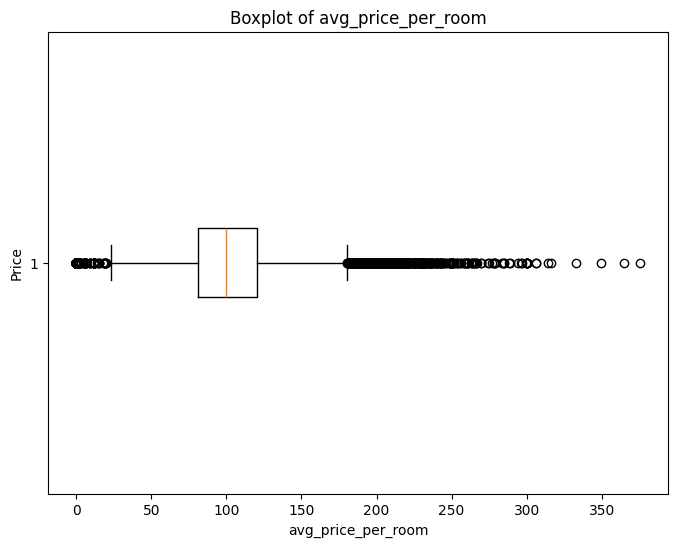

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(data['avg_price_per_room'], vert=False)
plt.title('Boxplot of avg_price_per_room')
plt.xlabel('avg_price_per_room')
plt.ylabel('Price')
plt.savefig('../reports/images/boxplot_avg_price_per_room.png')
plt.show()

In [49]:
from scipy.stats import kstest, norm

# Perform the Kolmogorov-Smirnov test
kstest_result = kstest(data['avg_price_per_room'], 'norm')

# Get the test statistic and p-value
test_statistic = kstest_result.statistic
p_value = kstest_result.pvalue

# Define the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("The values for 'avg_price_per_room' are not normally distributed.")
else:
    print("The values for 'avg_price_per_room' are normally distributed.")

The values for 'avg_price_per_room' are not normally distributed.


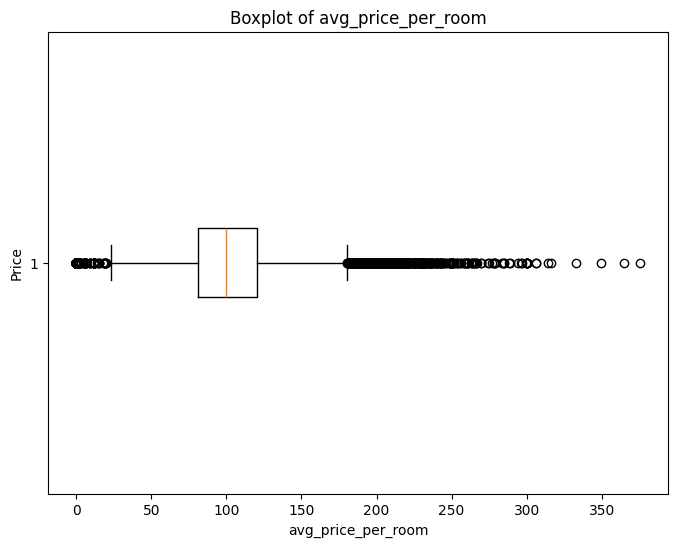

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(data['avg_price_per_room'], vert=False)
plt.title('Boxplot of avg_price_per_room')
plt.xlabel('avg_price_per_room')
plt.ylabel('Price')
plt.savefig('../reports/images/boxplot_avg_price_per_room.png')
plt.show()

In [51]:
# Detect and remove outliers using the IQR method
Q1 = data['avg_price_per_room'].quantile(0.25)
Q3 = data['avg_price_per_room'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
data = data[(data['avg_price_per_room'] >= lower_bound) & (data['avg_price_per_room'] <= upper_bound)]

data.shape

(34605, 31)

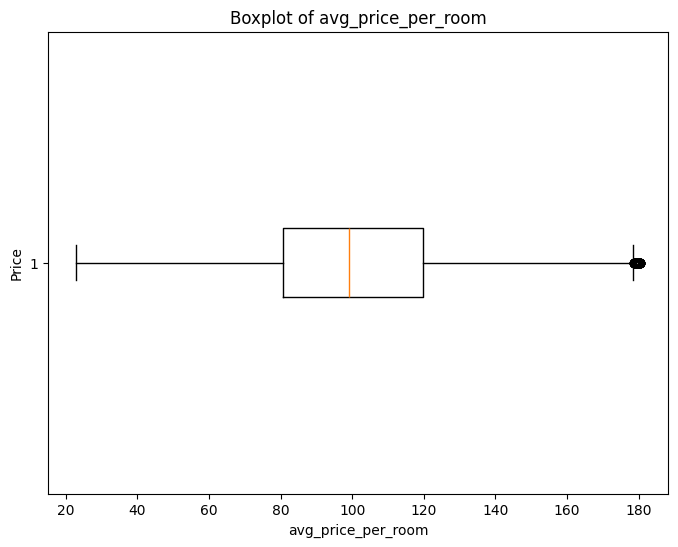

In [52]:
# Plot the boxplot of the 'avg_price_per_room' column after removing outliers
plt.figure(figsize=(8, 6))
plt.boxplot(data['avg_price_per_room'], vert=False)
plt.title('Boxplot of avg_price_per_room')
plt.xlabel('avg_price_per_room')
plt.ylabel('Price')
plt.savefig('../reports/images/boxplot_avg_price_per_room.png')
plt.show()

In [53]:
from scipy.stats import kstest, norm

# Perform the Kolmogorov-Smirnov test
kstest_result = kstest(data['avg_price_per_room'], 'norm')

# Get the test statistic and p-value
test_statistic = kstest_result.statistic
p_value = kstest_result.pvalue

# Define the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("The values for 'avg_price_per_room' are not normally distributed.")
else:
    print("The values for 'avg_price_per_room' are normally distributed.")

The values for 'avg_price_per_room' are not normally distributed.


In [54]:
p_value, test_statistic

(np.float64(0.0), np.float64(1.0))

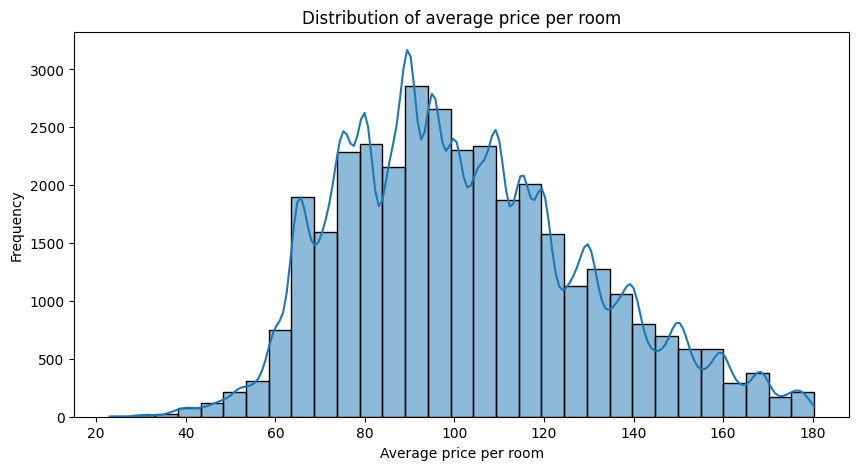

In [55]:
# plot histogram for data
plt.figure(figsize=(10, 5))
sns.histplot(data['avg_price_per_room'], kde=True, binwidth=5, kde_kws={'bw_adjust': 0.5})
plt.title('Distribution of average price per room')
plt.xlabel('Average price per room')
plt.ylabel('Frequency')
plt.savefig('../reports/images/avg_price_per_room_distribution.png')
plt.show()

## no_of_special_requests

In [56]:
data.to_csv('../data/processed/hotel_reservations_encoded_temp2.csv', index=False)

In [57]:
new_data = pd.read_csv('../data/processed/hotel_reservations_encoded_temp2.csv')

In [58]:
new_data.shape

(34605, 31)

In [59]:
# Group the 'no_of_special_requests' column into categories
new_data['no_of_special_requests'] = new_data['no_of_special_requests'].apply(lambda x: '0' if x == 0 else '1' if x == 1 else '2+' if x >= 2 else 'Unknown')

# Perform one-hot encoding on the 'no_of_special_requests' column
encoder.fit(new_data[['no_of_special_requests']])
no_of_special_requests_encoded = encoder.transform(new_data[['no_of_special_requests']]).toarray().astype('int64')
no_of_special_requests_encoded_df = pd.DataFrame(no_of_special_requests_encoded, columns=encoder.get_feature_names_out(['no_of_special_requests']))

# Implement the n-1 rule by dropping the last column
no_of_special_requests_encoded_df = no_of_special_requests_encoded_df.drop(no_of_special_requests_encoded_df.columns[-1], axis=1)

no_of_special_requests_encoded_df.head()

,no_of_special_requests_0,no_of_special_requests_1
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


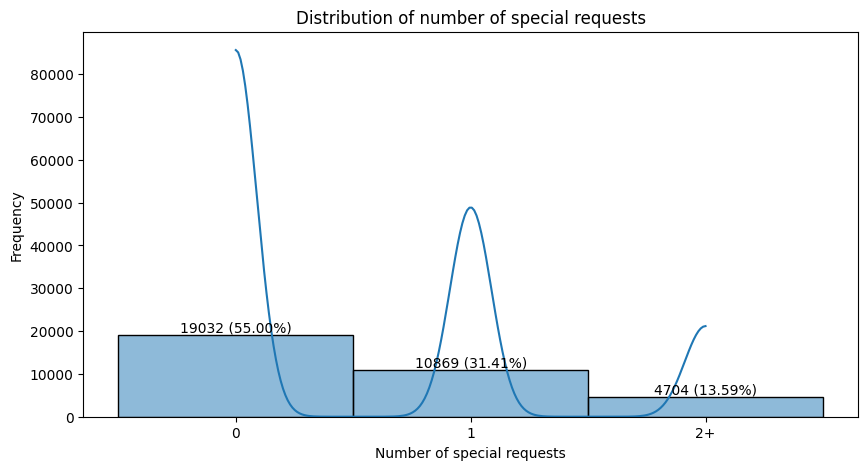

In [60]:
# Plot the histogram for the 'no_of_special_requests' column
plt.figure(figsize=(10, 5))
sns.histplot(new_data['no_of_special_requests'], kde=True, binwidth=1)
plt.title('Distribution of number of special requests')
plt.xlabel('Number of special requests')
plt.ylabel('Frequency')

# Count the number of records in each bin
value_counts = new_data['no_of_special_requests'].value_counts()
total_records = len(new_data['no_of_special_requests'])

# Display the count and percentage at the top of each bar
for index, count in value_counts.items():
    percentage = (count / total_records) * 100
    plt.text(index, count, f"{count} ({percentage:.2f}%)", ha='center', va='bottom')

plt.show()

In [61]:
# Drop the 'no_of_special_requests' column
new_data.drop(columns=['no_of_special_requests'], inplace=True)

# Concatenate the encoded data with the original data
data = pd.concat([new_data, no_of_special_requests_encoded_df], axis=1)

In [62]:
data.shape

(34605, 32)

In [63]:
data.head()

,no_of_adults,lead_time,arrival_year,arrival_month,arrival_date,avg_price_per_room,booking_status,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,...,no_of_weekend_nights_1,no_of_weekend_nights_2,no_of_week_nights_0,no_of_week_nights_1,no_of_week_nights_2,no_of_week_nights_3,no_of_week_nights_4,no_of_week_nights_5,no_of_special_requests_0,no_of_special_requests_1
0,2,224,2017,10,2,65.00,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,2,5,2018,11,6,106.68,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,1,1,2018,2,28,60.00,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
3,2,211,2018,5,20,100.00,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2,48,2018,4,11,94.50,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0


## Anomaly detection using Isolation Forest

In [64]:
# Detect the outliers in each column using the IsoForest algorithm
from sklearn.ensemble import IsolationForest

# Create an instance of the IsolationForest class
iso_forest = IsolationForest(contamination=0.075, random_state=0)

In [65]:
# Use fit predict to detect outliers in the data
outliers = iso_forest.fit_predict(data.drop(columns=['booking_status'], axis=1))
outliers_iso_forest = outliers[outliers == -1]

In [66]:
outliers_iso_forest.shape

(2596,)

In [67]:
# Detect why the outliers are outliers
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce the dimensionality of the data
tsne = TSNE(n_components=2)
data_reduced = tsne.fit_transform(data)

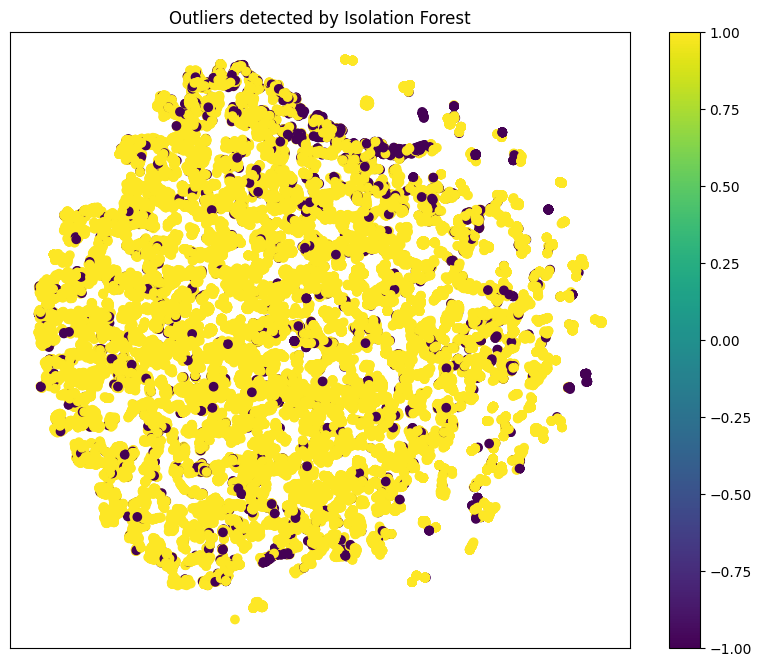

In [68]:
# Plot the data
plt.figure(figsize=(10, 8))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=outliers, cmap='viridis')
plt.colorbar()
plt.title('Outliers detected by Isolation Forest')
plt.xticks([])
plt.yticks([])
plt.savefig('../reports/images/outliers_iso_forest.png')
plt.show()

In [69]:
# Get outlier indices from the data
outlier_indices = data.index[outliers == -1]

data.loc[outlier_indices]

,no_of_adults,lead_time,arrival_year,arrival_month,arrival_date,avg_price_per_room,booking_status,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,...,no_of_weekend_nights_1,no_of_weekend_nights_2,no_of_week_nights_0,no_of_week_nights_1,no_of_week_nights_2,no_of_week_nights_3,no_of_week_nights_4,no_of_week_nights_5,no_of_special_requests_0,no_of_special_requests_1
30,2,3,2017,9,19,177.50,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
32,0,56,2018,12,7,82.44,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
44,2,55,2017,11,18,60.00,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
53,2,51,2017,11,11,60.00,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
72,2,34,2017,10,25,75.00,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34524,1,40,2017,10,21,90.27,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
34545,2,275,2018,4,17,110.00,1,0,1,0,...,0,1,1,0,0,0,0,0,1,0
34582,2,65,2018,7,27,177.30,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
34592,3,178,2018,8,1,137.25,1,1,0,0,...,1,0,0,0,0,0,1,0,0,1


In [70]:
# Drop the outliers from the data
data = data.drop(outlier_indices)
data.shape

(32009, 32)

In [71]:
# Get indices where the arrival_date is 29 and arrival_month is 2
index = data[(data['arrival_date'] == 29) & (data['arrival_month'] == 2)].index

In [73]:
index.shape

(28,)

In [74]:
# Drop the records with the index
data = data.drop(index)

data.shape

(31981, 32)

In [75]:
data.to_csv('../data/processed/hotel_reservations_encoded_cleaned.csv', index=False)